Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [ ]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [ ]:
# imports
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install plotly

!{sys.executable} -m pip install collections

from collections import namedtuple

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [4]:
twitch_df = pd.read_csv("twitch_clean_data.csv", parse_dates=["Date"])
twitch_df.head()

,Date,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,...,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,2.98,114,6,0,0,1,0.0,11,5,...,0,1,0,0.0,0.0,0.0,1,0.033333,12.666666666666666,66.66666666666666
1,2017-06-14,3.47,260,9,0,0,2,0.0,35,8,...,0,0,1,0.0,0.0,0.0,2,0.066667,10.0,34.61538461538461
2,2017-06-15,4.45,40,3,0,0,2,0.0,1,8,...,0,0,0,0.0,0.0,0.0,3,0.100000,40.0,300.0
3,2017-06-16,3.73,38,5,0,0,2,0.0,17,6,...,0,0,0,0.0,0.0,0.0,4,0.133333,2.923076923076923,38.46153846153847
4,2017-06-17,3.99,100,8,0,0,0,0.0,16,7,...,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333333333334,66.66666666666666


In [5]:
twitch_df.columns


Index(['Date', 'Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'Sub Revenue', 'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue',
       'Ad Revenue', 'Extensions Revenue', 'Bounties Revenue', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs', 'Tier 3 subs',
       'Total Gifted Subs', 'Gifted Tier 1 subs', 'Gifted Tier 2 subs',
       'Gifted Tier 3 subs', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'Total_Sub_Revenue', 'donations', 'Total_Earnings', 'streak',
       'activity', 'avg_message_per_viewer', 'user_chatting_percent'],
      dtype='object')

In [6]:
twitch_df.isnull().sum()

Date                           0
Average Viewers                0
Chat Messages                  0
Chatters                       0
Clip Views                     0
Clips Created                  0
Follows                        0
Hosts and Raids Viewers (%)    0
Live Views                     0
Max Viewers                    0
Minutes Watched                0
Minutes Streamed               0
Unique Viewers                 0
Sub Revenue                    0
Prime Revenue                  0
Gifted Subs Revenue            0
Bits Revenue                   0
Ad Revenue                     0
Extensions Revenue             0
Bounties Revenue               0
Prime Subs                     0
Total Paid Subs                0
Tier 1 subs                    0
Tier 2 subs                    0
Tier 3 subs                    0
Total Gifted Subs              0
Gifted Tier 1 subs             0
Gifted Tier 2 subs             0
Gifted Tier 3 subs             0
day_of_week_1                  0
day_of_wee

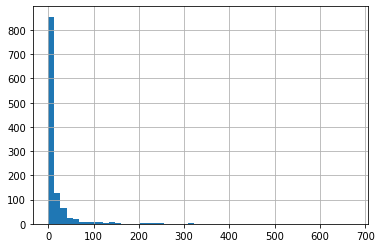

In [7]:
twitch_df['Total_Earnings'].hist(bins=50);

In [8]:
# lets get an average sales price
guess_price = twitch_df['Total_Earnings'].mean()
guess_price

19.597481449525453

In [9]:
# # make function that will do it for us
# def get_naive_baseline(target_feature):
#   guess = target_feature.mean()
#   errors = guess - target_feature
#   mean_absolute_error = errors.abs().mean()

#   naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE"])

#   return naive_baseline(guess, errors, mean_absolute_error)

In [10]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [11]:
y_target = twitch_df['Total_Earnings']

In [31]:
twitch_df["avg_message_per_viewer"].isnull().sum()

0

In [12]:
print(nbaseline.guess)
print(nbaseline.MAE)
print(nbaseline.errors.shape)

19.597481449525453
24.54002158371927
(1159,)


In [44]:
# make function that will do it for us
def get_naive_baseline(target_feature):
  guess = target_feature.mean()
  errors = guess - target_feature
  mean_absolute_error = errors.abs().mean()

#   y_pred = [target_feature.mean()] * len(target_feature.iloc[:,0])
  y_pred = target_feature *target_feature.mean()
  r2 = r2_score(target_feature, y_pred)

  naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE", "R2"])

  return naive_baseline(guess, errors, mean_absolute_error, r2)

In [45]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [46]:
nbaseline

baseline_info(guess=19.597481449525453, errors=0       19.597481
1       19.597481
2       19.597481
3       19.597481
4       19.597481
          ...    
1154    17.142481
1155    19.597481
1156    17.196981
1157    13.936981
1158    16.137481
Name: Total_Earnings, Length: 1159, dtype: float64, MAE=24.54002158371927, R2=-389.7386405780524)

In [36]:
twitch_df['Total_Earnings'].mean()

19.597481449525453

In [43]:
a= twitch_df['Total_Earnings'] *twitch_df['Total_Earnings'].mean()
a

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
1154     48.111817
1155      0.000000
1156     47.043754
1157    110.931544
1158     67.807286
Name: Total_Earnings, Length: 1159, dtype: float64

In [ ]:
y_pred = [twitch_df["Total_Earnings"].mean()] * len(twitch_df["Total_Earnings"])
y_pred

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
mean_squared_error(y_target, y_pred)

2960.2625199312783

In [18]:
# Make a function to create Matrix and Target pre validation split
def create_Xmatrix_ytarget(training_df):
  y_target = training_df["Total_Earnings"]
  X_matrix = training_df.drop("Total_Earnings", axis=1)
  return (X_matrix, y_target)

In [19]:
X_matrix, y_target = create_Xmatrix_ytarget(twitch_df)
print(X_matrix.shape)
print(y_target.shape)

(1159, 42)
(1159,)


# Train Val Test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20, random_state=42)

In [24]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

(927, 42)
(927,)
(232, 42)
(232,)


In [25]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20, random_state=42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(741, 42)
(741,)
(186, 42)
(186,)
(232, 42)
(232,)


In [ ]:
X_matrix.info()